In [1]:
import os
os.chdir('G:\\freecloud\\ThinkpadC_space\\Desktop\\资料\\资料\\量化投资：以Python为工具\\Python Quant Book\\part 5\\029')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
BOCM=pd.read_csv('BOCM.csv')
BOCM.index=BOCM.iloc[:,1]
BOCM.index=pd.to_datetime(BOCM.index, format='%Y-%m-%d')
BOCM=BOCM.iloc[:,2:]
BOCM.head()

,Open,High,Low,Close,Volume
Date,,,,,
2014-01-02,3.82,3.84,3.80,3.82,57317900
2014-01-03,3.81,3.83,3.76,3.79,64039600
2014-01-06,3.79,3.79,3.72,3.75,73494700
2014-01-07,3.73,3.79,3.72,3.77,48477500
2014-01-08,3.77,3.84,3.76,3.80,47952000


In [5]:
BOCMclp=BOCM.Close
clprcChange=BOCMclp-BOCMclp.shift(1)
clprcChange=clprcChange.dropna()
clprcChange[0:6]

Date
2014-01-03   -0.03
2014-01-06   -0.04
2014-01-07    0.02
2014-01-08    0.03
2014-01-09   -0.01
2014-01-10    0.01
Name: Close, dtype: float64

In [6]:
indexprc=clprcChange.index
upPrc=pd.Series(0,index=indexprc)
upPrc[clprcChange>0]=clprcChange[clprcChange>0]
downPrc=pd.Series(0,index=indexprc)
downPrc[clprcChange<0]=-clprcChange[clprcChange<0]
rsidata=pd.concat([BOCMclp,clprcChange,upPrc,downPrc],axis=1)
rsidata.columns=['Close','PrcChange','upPrc','downPrc']
rsidata=rsidata.dropna();
rsidata.head()

,Close,PrcChange,upPrc,downPrc
Date,,,,
2014-01-03,3.79,-0.03,0.00,0.03
2014-01-06,3.75,-0.04,0.00,0.04
2014-01-07,3.77,0.02,0.02,0.00
2014-01-08,3.80,0.03,0.03,0.00
2014-01-09,3.79,-0.01,0.00,0.01


In [7]:
SMUP=[]
SMDOWN=[]
for i in range(6,len(upPrc)+1):
    SMUP.append(np.mean(upPrc.values[(i-6):i],dtype=np.float32))
    SMDOWN.append(np.mean(downPrc.values[(i-6):i],dtype=np.float32))

rsi6=[100*SMUP[i]/(SMUP[i]+SMDOWN[i]) for i in range(0,len(SMUP))]

In [8]:
indexRsi=indexprc[5:]
Rsi6=pd.Series(rsi6,index=indexRsi)
Rsi6.head()

Date
2014-01-10    42.857141
2014-01-13    61.538465
2014-01-14    66.666665
2014-01-15    46.153845
2014-01-16    30.000001
dtype: float64

In [9]:
Rsi6.describe()

count    327.000000
mean      51.742495
std       27.787794
min        0.000000
25%       30.000001
50%       51.298706
75%       74.547477
max      100.000000
dtype: float64

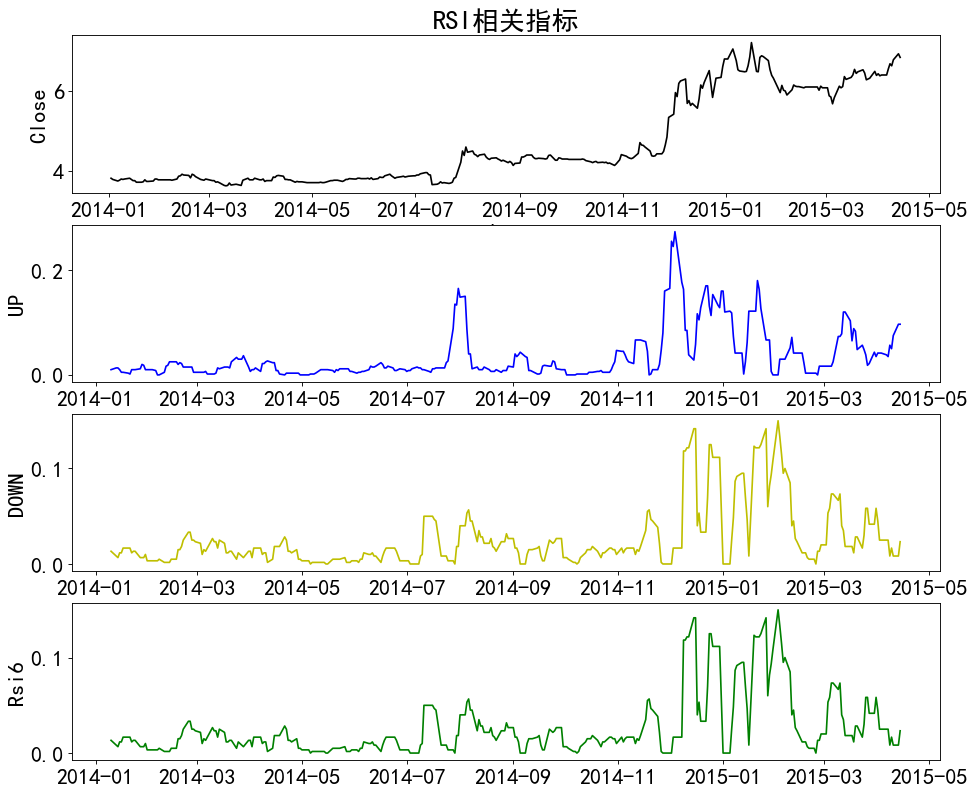

In [49]:
UP=pd.Series(SMUP,index=indexRsi)
DOWN=pd.Series(SMDOWN,index=indexRsi)
plt.figure(figsize=(14,12),dpi=80)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.subplot(411)
plt.plot(BOCMclp,'k')
plt.xlabel('date')
plt.ylabel('Close')
plt.title('RSI相关指标')
plt.subplot(412)
plt.plot(UP,'b')
plt.ylabel('UP')
plt.subplot(413)
plt.plot(DOWN,'y')
plt.ylabel('DOWN')
plt.subplot(414)
plt.plot(DOWN,'g')
plt.ylabel('Rsi6')
plt.show()

In [13]:
def rsi(price,period=6):
    import pandas as pd
    clprcChange=price-price.shift(1)
    clprcChange=clprcChange.dropna()
    indexprc=clprcChange.index
    upPrc=pd.Series(0,index=indexprc)
    upPrc[clprcChange>0]=clprcChange[clprcChange>0]
    downPrc=pd.Series(0,index=indexprc)
    downPrc[clprcChange<0]=-clprcChange[clprcChange<0]
    rsidata=pd.concat([price,clprcChange,upPrc,downPrc],\
    axis=1)
    rsidata.columns=['price','PrcChange','upPrc','downPrc']
    rsidata=rsidata.dropna();
    SMUP=[]
    SMDOWN=[]
    for i in range(period,len(upPrc)+1):
        SMUP.append(np.mean(upPrc.values[(i-period):i],\
        dtype=np.float32))
        SMDOWN.append(np.mean(downPrc.values[(i-period):i],\
        dtype=np.float32))
        rsi=[100*SMUP[i]/(SMUP[i]+SMDOWN[i]) \
        for i in range(0,len(SMUP))]
    indexRsi=indexprc[(period-1):]
    rsi=pd.Series(rsi,index=indexRsi)
    return(rsi)

In [14]:
Rsi12=rsi(BOCMclp,12)
Rsi12.tail()

Date
2015-04-08    57.894739
2015-04-09    59.782604
2015-04-10    77.777780
2015-04-13    80.582524
2015-04-14    73.636363
dtype: float64

In [15]:
Rsi24=rsi(BOCMclp,24)
Rsi24.tail()

Date
2015-04-08    72.522525
2015-04-09    68.867922
2015-04-10    66.666665
2015-04-13    70.334930
2015-04-14    66.976744
dtype: float64

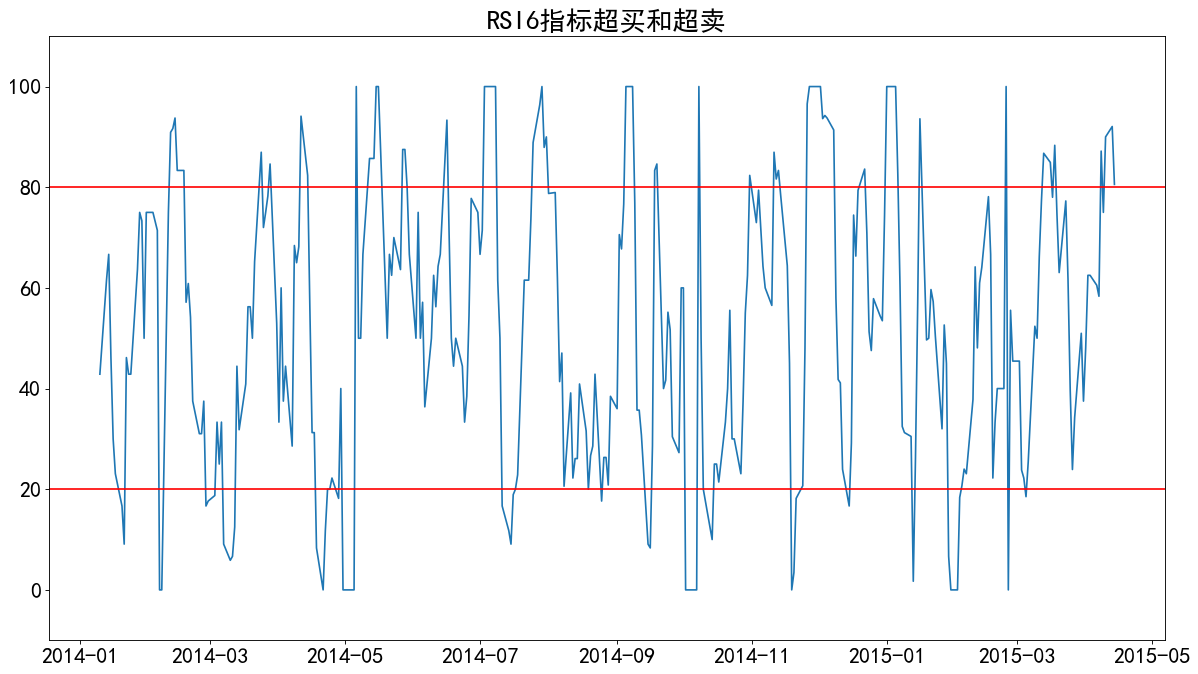

In [20]:
import matplotlib.pyplot as plt
import matplotlib
plt.figure(figsize=(18,10),dpi=80)
plt.plot(Rsi6)
matplotlib.rcParams['axes.unicode_minus']=False
plt.rc('font', family='SimHei', size=20)
plt.title('RSI6指标超买和超卖')
plt.ylim(-10,110)
plt.axhline(y=80,color='red')
plt.axhline(y=20,color='red')
plt.show()

# 黄金交叉与死亡交叉

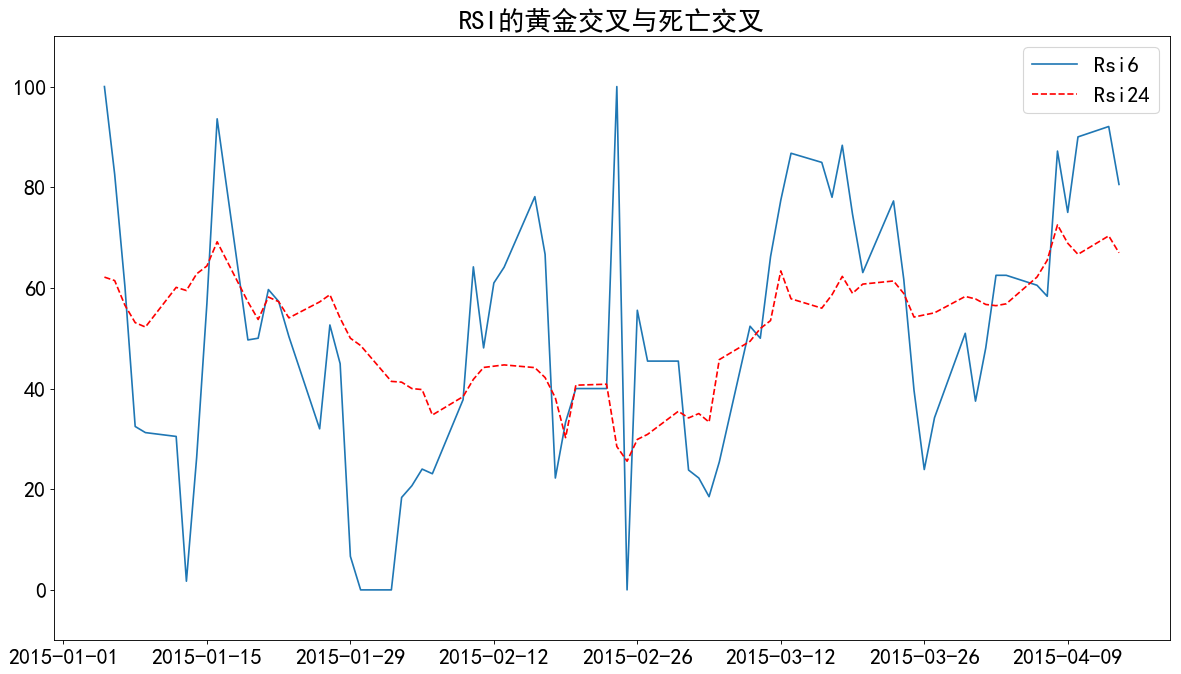

In [21]:
plt.figure(figsize=(18,10),dpi=80)
matplotlib.rcParams['axes.unicode_minus']=False
plt.plot(Rsi6['2015-01-03':],label="Rsi6")
plt.plot(Rsi24['2015-01-03':],\
         label="Rsi24",color='red',\
         linestyle='dashed')
plt.title("RSI的黄金交叉与死亡交叉")
plt.ylim(-10,110)
plt.legend()
plt.show()

# strategy

In [23]:
BOCM=pd.read_csv('BOCM.csv')
BOCM.index=BOCM.iloc[:,1]
BOCM.index=pd.to_datetime(BOCM.index, format='%Y-%m-%d')
BOCMclp=BOCM.Close
BOCMclp[0:4]

Date
2014-01-02    3.82
2014-01-03    3.79
2014-01-06    3.75
2014-01-07    3.77
Name: Close, dtype: float64

In [24]:
rsi6=rsi(BOCMclp,6)
rsi24=rsi(BOCMclp,24)

# rsi6捕捉买卖点

In [25]:
Sig1=[]
for i in rsi6:
    if i>80:
        Sig1.append(-1)
    elif i<20:
        Sig1.append(1)
    else:
        Sig1.append(0)

In [26]:
date1=rsi6.index
Signal1=pd.Series(Sig1,index=date1)
Signal1[Signal1==1].head(n=3)

Date
2014-01-20    1
2014-01-21    1
2014-02-06    1
dtype: int64

In [27]:
Signal1[Signal1==-1].head(n=3)

Date
2014-02-11   -1
2014-02-12   -1
2014-02-13   -1
dtype: int64

In [28]:
Signal2=pd.Series(0,index=rsi24.index)
lagrsi6= rsi6.shift(1)
lagrsi24= rsi24.shift(1)

In [29]:
for i in rsi24.index:
    if (rsi6[i]>rsi24[i]) & (lagrsi6[i]<lagrsi24[i]):
        Signal2[i]=1
    elif (rsi6[i]<rsi24[i]) & (lagrsi6[i]>lagrsi24[i]):
        Signal2[i]=-1

In [30]:
signal=Signal1+Signal2
signal[signal>=1]=1
signal[signal<=-1]=-1
signal=signal.dropna()

In [31]:
tradSig=signal.shift(1)

ret=BOCMclp/BOCMclp.shift(1)-1
ret.head()

Date
2014-01-02         NaN
2014-01-03   -0.007853
2014-01-06   -0.010554
2014-01-07    0.005333
2014-01-08    0.007958
Name: Close, dtype: float64

In [32]:
ret=ret[tradSig.index]
buy=tradSig[tradSig==1]
buyRet=ret[tradSig==1]*buy

In [33]:
sell=tradSig[tradSig==-1]
sellRet=ret[tradSig==-1]*sell

In [34]:
tradeRet=ret*tradSig

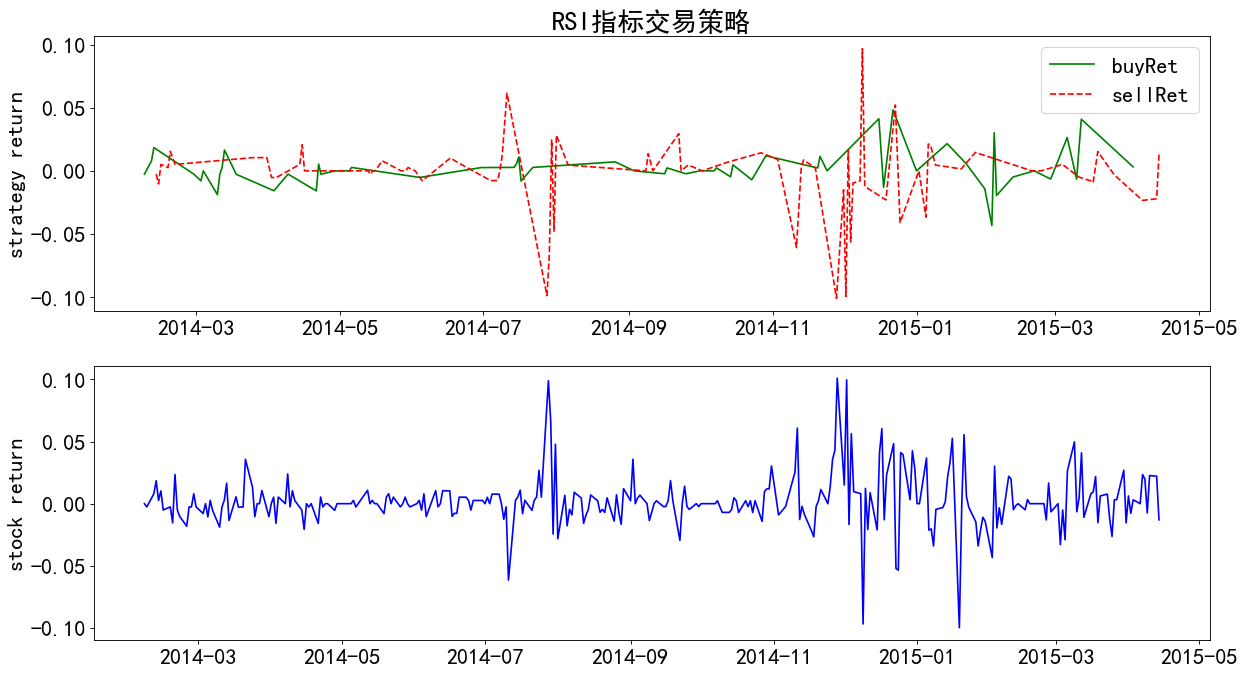

In [37]:
plt.figure(figsize=(18,10),dpi=80)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.subplot(211)
plt.plot(buyRet,label="buyRet",color='g')
plt.plot(sellRet,label="sellRet",color='r',linestyle='dashed')
plt.title("RSI指标交易策略")
plt.ylabel('strategy return')
plt.legend()
plt.subplot(212)
plt.plot(ret,'b')
plt.ylabel('stock return')
plt.show()

In [38]:
def strat(tradeSignal,ret):
    indexDate=tradeSignal.index
    ret=ret[indexDate]
    tradeRet=ret*tradeSignal
    tradeRet[tradeRet==(-0)]=0
    winRate=len(tradeRet[tradeRet>0])/len(\
    tradeRet[tradeRet!=0])
    meanWin=sum(tradeRet[tradeRet>0])/len(\
    tradeRet[tradeRet>0])
    meanLoss=sum(tradeRet[tradeRet<0])/len(\
    tradeRet[tradeRet<0])
    perform={'winRate':winRate,\
    'meanWin':meanWin,\
    'meanLoss': meanLoss}
    return(perform)

In [39]:
BuyOnly=strat(buy,ret)
SellOnly=strat(sell,ret)
Trade=strat(tradSig,ret)
Test=pd.DataFrame({"BuyOnly":BuyOnly,\
        "SellOnly":SellOnly,"Trade":Trade})
Test

,BuyOnly,SellOnly,Trade
meanLoss,-0.009230,-0.028476,-0.019797
meanWin,0.012996,0.015883,0.014691
winRate,0.530612,0.569231,0.547826


# 累计收益率

In [40]:
cumStock=np.cumprod(1+ret)-1
cumTrade=np.cumprod(1+tradeRet)-1

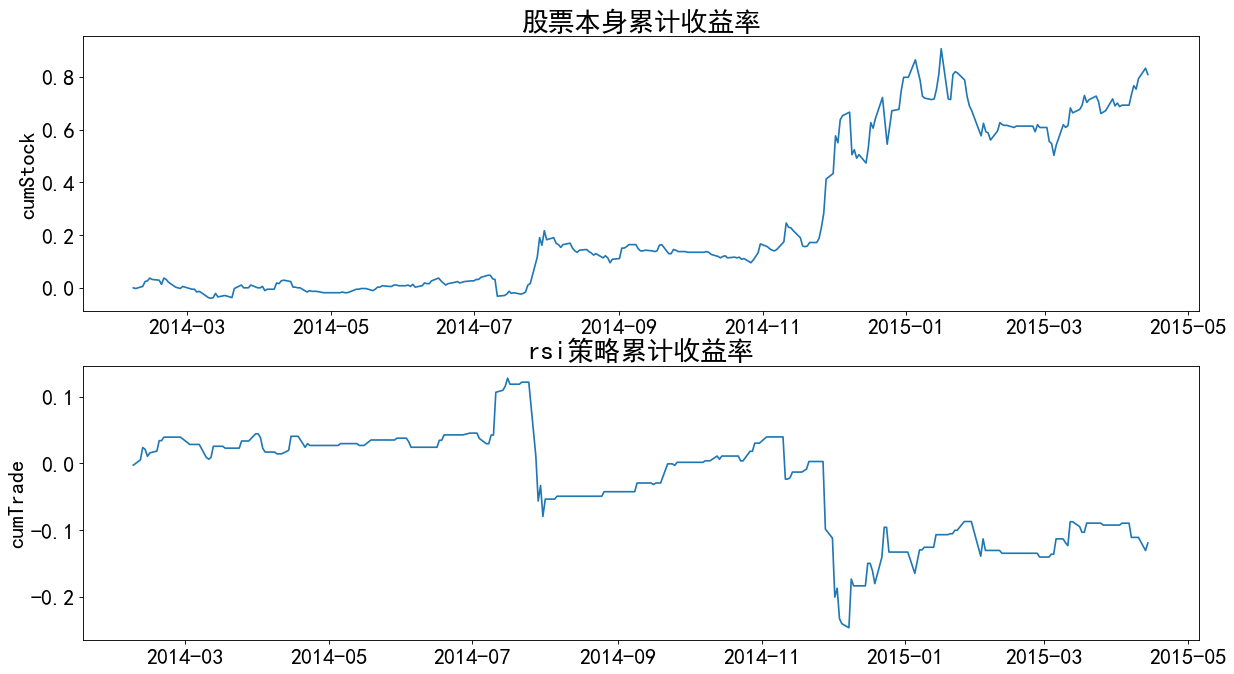

In [43]:
plt.figure(figsize=(18,10),dpi=80)
plt.subplot(211)
plt.plot(cumStock)
plt.ylabel('cumStock')
plt.title('股票本身累计收益率')
plt.subplot(212)
plt.plot(cumTrade)
plt.ylabel('cumTrade')
plt.title('rsi策略累计收益率')
plt.show()

# 修正策略

In [44]:
tradSig2=signal.shift(3)
ret2=ret[tradSig2.index]
buy2=tradSig[tradSig2==1]
buyRet2=ret2[tradSig2==1]*buy2
sell2=tradSig2[tradSig2==-1]
sellRet2=ret2[tradSig2==-1]*sell2
tradeRet2=ret2*tradSig2
BuyOnly2=strat(buy2,ret2)
SellOnly2=strat(sell2,ret2)
Trade2=strat(tradSig2,ret2)
Test2=pd.DataFrame({"BuyOnly":BuyOnly2,\
      "SellOnly":SellOnly2,"Trade":Trade2})
Test2

,BuyOnly,SellOnly,Trade
meanLoss,-0.013085,-0.016942,-0.015167
meanWin,0.018347,0.017260,0.016922
winRate,0.523810,0.537313,0.537815


In [45]:
cumStock2=np.cumprod(1+ret2)-1
print(cumStock2[-1])
cumTrade2=np.cumprod(1+tradeRet2)-1
print(cumTrade2[-1])

0.809523809524
0.299171578139


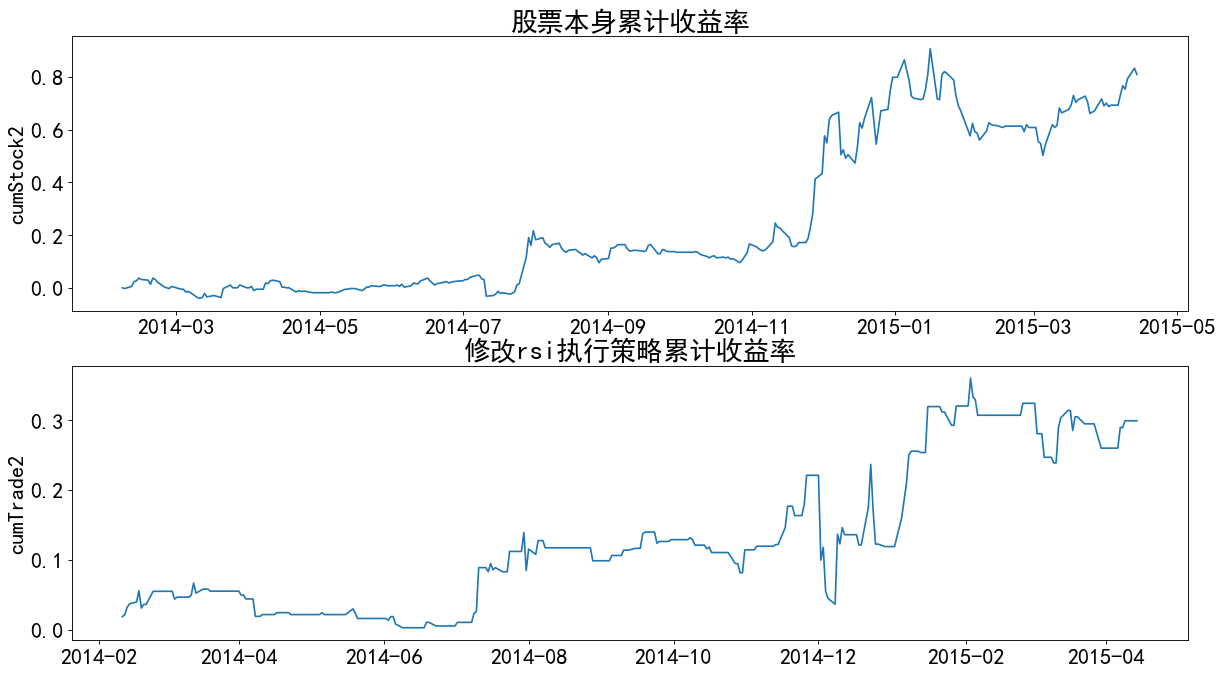

In [48]:
plt.figure(figsize=(18,10),dpi=80)
plt.subplot(211)
plt.plot(cumStock2)
plt.ylabel('cumStock2')
plt.title('股票本身累计收益率')
plt.subplot(212)
plt.plot(cumTrade2)
plt.ylabel('cumTrade2')
plt.title('修改rsi执行策略累计收益率')
plt.show()

In [51]:
import pandas as pd
import numpy as np
import os
os.chdir('G:\\freecloud\\ThinkpadC_space\\Desktop\\资料\\资料\量化投资：以Python为工具\\PythonANS')

In [52]:
import pandas as pd
import numpy as np
def rsi(price,period=6):
    import pandas as pd
    clprcChange=price-price.shift(1)
    clprcChange=clprcChange.dropna()
    indexprc=clprcChange.index
    upPrc=pd.Series(0,index=indexprc)
    upPrc[clprcChange>0]=clprcChange[clprcChange>0]
    downPrc=pd.Series(0,index=indexprc)
    downPrc[clprcChange<0]=-clprcChange[clprcChange<0]
    rsidata=pd.concat([price,clprcChange,upPrc,downPrc],\
    axis=1)
    rsidata.columns=['price','PrcChange','upPrc','downPrc']
    rsidata=rsidata.dropna();
    SMUP=[]
    SMDOWN=[]
    for i in range(period,len(upPrc)+1):
        SMUP.append(np.mean(upPrc.values[(i-period):i],\
        dtype=np.float32))
        SMDOWN.append(np.mean(downPrc.values[(i-period):i],\
        dtype=np.float32))
        rsi=[100*SMUP[i]/(SMUP[i]+SMDOWN[i]) \
        for i in range(0,len(SMUP))]
    indexRsi=indexprc[(period-1):]
    rsi=pd.Series(rsi,index=indexRsi)
    return(rsi)


# 1.选择中国交通银行2013年的日交易数据，分别计算5日、6日、7日、8日、9日、10日、12日RSI值，并入dataframe数据

In [53]:
import pandas as pd
import numpy as np

In [54]:
jtyh = pd.read_csv('Data/Part5/003/problem29-1.csv',
                index_col='date')               
jtyh.index.name='Date'
jtyh.index = pd.to_datetime(jtyh.index,format='%Y-%m-%d')
RSI5 = rsi(jtyh.Close,5)
RSI6 = rsi(jtyh.Close,6)
RSI7 = rsi(jtyh.Close,7)
RSI8 = rsi(jtyh.Close,8)
RSI9 = rsi(jtyh.Close,9)
RSI10 = rsi(jtyh.Close,10)
RSI12 = rsi(jtyh.Close,12)

E:\Data_analysis_plan\python_36_install\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


In [55]:
RSI_all =pd.concat([RSI5,RSI6,RSI7,RSI8,RSI9,RSI10,RSI12],1)

In [61]:
RSI_all.columns = ['5日RSI','6日RSI','7日RSI','8日RSI','9日RSI','10日RSI','12日RSI']

In [63]:
RSI_all.tail()

,5日RSI,6日RSI,7日RSI,8日RSI,9日RSI,10日RSI,12日RSI
Date,,,,,,,
2013-12-25,24.242423,24.242423,26.470585,24.999998,23.076921,21.951220,19.148934
2013-12-26,22.857141,20.512820,20.512820,22.499999,21.428571,19.999998,16.981132
2013-12-27,57.142858,30.769231,27.906977,27.906976,29.545455,28.260868,25.490196
2013-12-30,18.181817,39.999999,24.999997,23.076923,23.076922,24.528301,22.413792
2013-12-31,31.999997,30.769230,47.058821,30.769231,28.571429,28.571428,28.813558


# 2.选择中国交通银行2013年至2014年的日交易数据
# ①绘制中国交通银行股票的K线图

In [159]:
jtyh = pd.read_csv('Data/Part5/003/problem29-2.csv',
                index_col='date')               
jtyh.index.name='Date'
jtyh.index = pd.to_datetime(jtyh.index,format='%Y-%m-%d')

In [160]:
import matplotlib.pyplot as plt 
import matplotlib

# 在K线图的制作中，出现图示过多导致相互重叠的情况，此问题可以通过Spyder3.6解决

In [ ]:
import candle
plt.figure(figsize=(18,10),dpi=80)
candle.candlePlot(jtyh,'Candle Plot of Bank of Communications')

E:\Data_analysis_plan\python_36_install\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


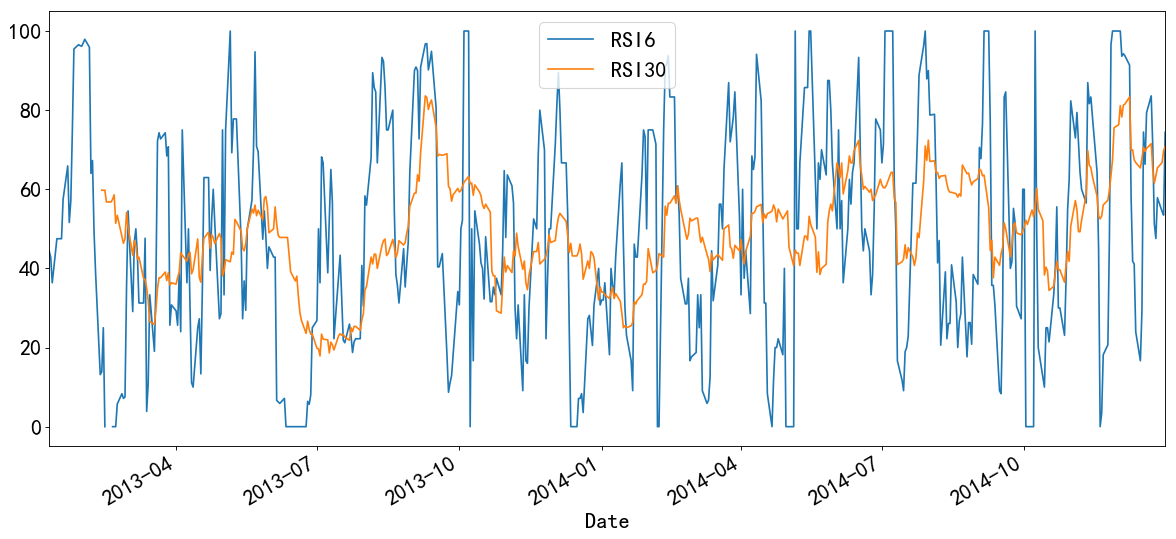

In [161]:
RSI6 = rsi(jtyh.Close,6)
RSI30 = rsi(jtyh.Close,30)
RSI = pd.concat([RSI6,RSI30],1)
RSI.columns=['RSI6','RSI30']
plt.figure(figsize=(18,8),dpi=80)
axe1=plt.subplot(111)
#在第一个画面中画出序列的自相关系数图 
plot1=RSI.plot(ax=axe1)
plt.show()

# ③设定6日RSI取值大于90，为超买区，释放卖出信号；6日RSI取值小于10时，为超卖区，释放买入信号。编写策略并计算策略准确率

In [162]:
signal = np.where(RSI6>90,-1,np.where(RSI6<10,1,0))
ret = (jtyh.Close-jtyh.Close.shift(1))/jtyh.Close.shift(1)
ret6 = ret[6:]
signal = pd.Series(signal,index=ret6.index)
RSI_ret = ret6[1:] * signal.shift(1)[1:]
sum(RSI_ret>0)/sum(signal!=0)

0.40566037735849059

# ④当6日RSI线向上穿过30日RSI线时，为“黄金交叉”，释放买入信号；当6日RSI线向下穿过30日RSI线时，为“死亡交叉”，释放卖出信号。实现上述策略，并进行回测

In [178]:
RSI_all = pd.concat([RSI6,RSI30,RSI6.shift(1),RSI30.shift(1)],1)

In [179]:
RSI_all.columns = ['RSI6','RSI30','L_RSI6','L_RSI30']

In [180]:
signal = [1 if RSI_all.RSI6[i] > RSI_all.RSI30[i] and RSI_all.L_RSI6[i] < RSI_all.L_RSI30[i] else \
          -1 if RSI_all.RSI6[i] < RSI_all.RSI30[i] and RSI_all.L_RSI6[i] > RSI_all.L_RSI30[i] else 0 \
          for i in range(len(RSI_all))]  

In [181]:
signal = pd.Series(signal,index=ret6.index)

In [182]:
RSI_ret = ret30[1:] * signal.shift(1)[1:]

In [183]:
sum(RSI_ret>0)/sum(signal!=0)

0.33695652173913043

# 3.“RSI将叉不叉买入策略”:当短期RSI第一次向上穿过长期RSI时，为“黄金交叉”，此后，短期线向下运动，在即将突破长期线时又逆转向上运动，短期线再次向上突破长期线，即为“将叉不叉”现象，此时表明市场向上走势较强，释放买入信号。使用上题的原数据，短期线取6日，长期线取30日，编写策略，并计算其买入信号的预测准确率

In [198]:
RSI_all = pd.concat([RSI6,RSI30],1)[24:]
signal = np.zeros(len(RSI_all))
RSI_all.columns = ['RSI6','RSI30']

In [199]:
for i in range(3,len(RSI_all)):
    if RSI_all.RSI6[i-3] < RSI_all.RSI30[i-3] and \
    RSI_all.RSI6[i-2] > RSI_all.RSI30[i-2] and \
    RSI_all.RSI6[i-1] > RSI_all.RSI30[i-1] and \
    (RSI_all.RSI6[i-1] - RSI_all.RSI30[i-1]) < (RSI_all.RSI6[i-2] - RSI_all.RSI30[i-2]) and \
    (RSI_all.RSI6[i] - RSI_all.RSI30[i]) > (RSI_all.RSI6[i-1] - RSI_all.RSI30[i-1]):
        signal[i] = 1

In [200]:
signal = pd.Series(signal,index = RSI_all.index)
signal[signal==1]

Date
2013-08-01    1.0
2013-10-29    1.0
2014-01-09    1.0
2014-04-10    1.0
2014-09-04    1.0
2014-11-13    1.0
dtype: float64

In [201]:
buyDate=signal[signal==1]
ret.shift(-1)[buyDate.index]

Date
2013-08-01   -0.002611
2013-10-29    0.007092
2014-01-09    0.002639
2014-04-10    0.002577
2014-09-04    0.006865
2014-11-13   -0.008621
Name: Close, dtype: float64

In [204]:
print("买入信号的预测准确率为：%s" %(sum((ret.shift(-1)[buyDate.index])>0)/sum(signal==1)))

买入信号的预测准确率为：0.666666666667
